# Run SurvTRACE on METABRIC dataset

In [7]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from SurvTRACE.survtrace.dataset import load_data
from SurvTRACE.survtrace.evaluate_utils import Evaluator
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.train_utils import Trainer
from SurvTRACE.survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'metabric'

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 2,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 1,
}

In [8]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)



/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [9]:
df_train.head()

,x4,x5,x6,x7,x0,x1,x2,x3,x8
1,1.0,2.0,4.0,7.0,-1.073261,3.276337,-0.413222,-0.609223,1.915404
2,0.0,3.0,4.0,7.0,-0.336807,0.528473,1.227964,0.003054,-0.974702
3,0.0,2.0,4.0,6.0,0.513699,-0.877283,-1.561519,-0.635844,0.448772
5,1.0,3.0,4.0,7.0,-0.909893,0.092082,-0.228606,-0.362765,0.726992
6,1.0,3.0,4.0,7.0,-0.680120,-0.546313,-0.697159,-0.759283,-0.860639


In [10]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
                                   batch_size=hparams['batch_size'],
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!
train with single event
tensor([[0, 3, 4, 6],
        [1, 3, 4, 7]])
___
tensor([[ 0.4467, -1.1509, -0.6367,  0.4463,  1.0360],
        [-0.3836,  0.8360, -0.0118,  0.5633,  0.5991]])
___
None
___end___
tensor([[1, 3, 4, 7],
        [1, 2, 4, 7]])
___
tensor([[-0.5133,  0.5900,  0.6296,  1.0766,  0.0102],
        [-0.6834,  0.2381,  0.2915,  0.7874, -0.2495]])
___
None
___end___
tensor([[1, 3, 5, 7],
        [1, 3, 4, 7]])
___
tensor([[-0.1834, -0.1207,  1.5347, -1.3353, -0.7420],
        [-0.3637, -0.8303, -0.1002, -0.1413,  0.7478]])
___
None
___end___
tensor([[1, 3, 4, 7],
        [1, 3, 5, 7]])
___
tensor([[-0.0558, -0.1102, -0.0422, -0.4669, -0.4414],
        [-0.3710, -0.9899, -0.4661, -0.3517, -0.0106]])
___
None
___end___
tensor([[0, 2, 4, 7],
        [1, 2, 4, 7]])
___
tensor([[-0.7582,  1.2818,  0.3501,  0.5413, -0.2002],
        [-0.1457, -0.7757,  0.4390,  1.2907,  1.2988]])
___
None
___end___
tensor([[1, 2, 5, 7],
        [1, 3, 4,

In [ ]:
df_train.head()

In [ ]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
                                   batch_size=hparams['batch_size'],
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

In [ ]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

In [ ]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
                                   batch_size=hparams['batch_size'],
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

In [ ]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

In [ ]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

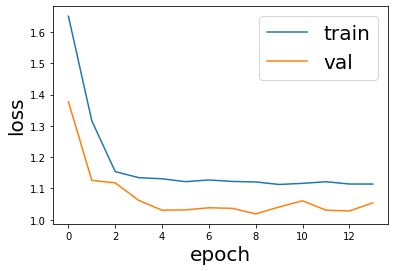

In [9]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()